# 2025 NPS

## Set up

### Import packages

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.copy_on_write = True    # Setting to make copy_on_write as default, removing warning 'SettingWithCopyWarning'.


### Upload files
* National Pain Survey 2025 responses
* [Australian Postcodes](https://www.matthewproctor.com/australian_postcodes)

In [602]:
# Read the survey responses. 
df = pd.read_csv('ChronicPainAustralia_DATA_2025-06-03_1138.csv')
print(df.shape)
df.head(5)

(4651, 259)


,record_id,cpa_nps_2025_timestamp,respondent_type,age,gender,gender_txt,state,postcode,income_weekly,first_nations,...,scm_fb,scm_inst,scm_tiktok,scm_tw,scm_yt,scm_pin,scm_reddit,scm_li,consent_marketing,cpa_nps_2025_complete
0,1,[not completed],connection,18-24,male,NaN,NSW,2137.0,ns,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2,2025-05-05 14:38:00,peer,35-44,female,NaN,TAS,NaN,3000-3999,ns,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2
2,3,2025-05-05 16:50:24,peer,55-64,male,NaN,NSW,2540.0,2000-2499,ns,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,0.0,2
3,4,[not completed],peer,65-74,female,NaN,NSW,2067.0,0500-999,no,...,0.0,0.0,NaN,NaN,3.0,0.0,0.0,0.0,NaN,0
4,5,2025-05-05 16:53:47,peer,55-64,female,NaN,NSW,2113.0,0500-999,no,...,4.0,0.0,0.0,NaN,2.0,0.0,1.0,1.0,1.0,2


In [603]:
df_labels = pd.read_csv('ChronicPainAustralia_DATA_LABELS_2025-06-03_1139.csv')
print(df_labels.shape)
df_labels.head(5)

(4651, 259)


,Record ID,Survey Timestamp,Please select from the following,What is your age?,What gender do you identify with?,"If not listed, please specify",What State or Territory do you live in?,What is your postcode?,"What is your weekly household income, after tax?",Do you identify as a First Nations person?,...,Facebook,Instagram,TikTok,Twitter,YouTube,Pinterest,Reddit,LinkedIn,"Would you like to become a free member of Chronic Pain Australia and get email updates of the latest chronic pain advocacy, news, research and events?",Complete?
0,1,[not completed],I know someone living with pain (e.g. someone ...,18-24,Male,NaN,NSW,2137.0,Prefer not to say,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incomplete
1,2,2025-05-05 14:38:00,I am someone living with pain,35-44,Female,NaN,TAS,NaN,$3000 - $3999,Prefer not to say,...,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Monthly,Yes,Complete
2,3,2025-05-05 16:50:24,I am someone living with pain,55-64,Male,NaN,NSW,2540.0,$2000 - $2499,Prefer not to say,...,NaN,NaN,NaN,NaN,Daily,NaN,NaN,NaN,No,Complete
3,4,[not completed],I am someone living with pain,65-74,Female,NaN,NSW,2067.0,$500 - $999,No,...,Never,Never,NaN,NaN,Weekly,Never,Never,Never,NaN,Incomplete
4,5,2025-05-05 16:53:47,I am someone living with pain,55-64,Female,NaN,NSW,2113.0,$500 - $999,No,...,Daily,Never,Never,NaN,Monthly,Never,Less frequently,Less frequently,Yes,Complete


In [604]:
postcode_lu = pd.read_csv('australian_postcodes.csv')
print(postcode_lu.shape)
postcode_lu.sample(5)

(18526, 41)


,id,postcode,locality,state,long,lat,dc,type,status,sa3,...,altitude,chargezone,phn_code,phn_name,lgaregion,lgacode,electorate,electoraterating,sed_code,sed_name
961,4433,2097,COLLAROY PLATEAU WEST,NSW,151.297895,-33.739577,COLLAROY PLATEAU WEST LPO,Delivery Area,Updated 6-Feb-2020,12203.0,...,105.676674,N1,PHN102,Northern Sydney,Northern Beaches,15990.0,Mackellar,Outer Metropolitan,10087.0,Wakehurst
6750,6704,3221,GEELONG MC,VIC,144.427419,-38.181608,Victoria Country 2,Delivery Area,Updated 6-Feb-2020,21702.0,...,8.327033,V2,PHN206,Western Victoria,Greater Geelong,22750.0,Corangamite,Provincial,27708.0,South Barwon (Western Victoria)
12870,14432,4807,AIRDMILLAN,QLD,147.133033,-19.914965,AYR,Delivery Area,Updated 6-Feb-2020,31801.0,...,64.005409,Q4,PHN307,Northern Queensland,Burdekin,31900.0,Kennedy,Rural,30011.0,Burdekin
16372,16168,6260,LAKE JASPER,WA,115.860627,-34.438738,PEMBERTON LPO,Delivery Area,Updated 6-Feb-2020,50103.0,...,143.299515,W2,PHN503,Country WA,Nannup,56300.0,Forrest,Rural,55706.0,Warren-Blackwood (South West)
3784,2188,2540,CALLALA BEACH,NSW,150.616440,-34.863483,NOWRA DC,Delivery Area,Updated 3-Dec-2022,90103.0,...,0.000000,N2,PHN106,South Eastern NSW,Unincorp. Other Territories,99399.0,Gilmore,Rural,99191.0,Unclassified (OT)


### Pre-processing responses

**Label completion rates.**
1. Create a new field 'completion_rate'.
2. Label COMPLETED responses. i.e. with a timestamp.
3. Label PARTIAL COMPLETION if responses have Respondent Type, Age, and either Gender or Postcode.
4. Label INCOMPLETE to everything else. 

In [605]:
# LABEL Completion Rates. 
df['completion_rate'] = np.nan      # Create new field.
df.loc[df['cpa_nps_2025_timestamp'] != '[not completed]', 'completion_rate'] = 'Completed'  # Label COMPLETED.

# Label PARTIAL COMPLETION
df.loc[(df['completion_rate'].isna() & df['respondent_type'].notna() & df['age'].notna() & df['gender'].notna()), 'completion_rate'] = 'Partial completion'                
df.loc[(df['completion_rate'].isna() & df['respondent_type'].notna() & df['age'].notna() & df['postcode'].notna()), 'completion_rate'] = 'Partial completion'

df.loc[(df['completion_rate'].isna()), 'completion_rate'] = 'Incomplete'    # Label INCOMPLETE. 

In [606]:
df['completion_rate'].value_counts()

Completed             3276
Partial completion     757
Incomplete             618
Name: completion_rate, dtype: int64

Drop incomplete responses

In [607]:
# Drop incomplete responses.
df = df.loc[df['completion_rate'] != 'Incomplete']
df.shape

(4033, 260)

In [608]:
# Corrected State = WA.
df.loc[df['state'] == '8', 'state'] = 'WA'
df['state'].unique()

array(['NSW', 'TAS', 'SA', 'QLD', 'VIC', 'ACT', 'WA', 'NT', nan],
      dtype=object)

### Postcode Lookup

In [609]:
# Filter postcode lookup to relevant columns and remove duplicate postcode and state.
postcode_lu = postcode_lu[['postcode', 'state', 'region', 'electoraterating', 'long', 'lat',   'lgaregion', 'electorate']]
postcode_lu = postcode_lu.drop_duplicates(subset=['postcode','state'], keep='last')
postcode_lu.shape

(3192, 8)

In [610]:
# Append Postcode Lookup.
print('df shape before:', df.shape)
df['postcode'] = df['postcode'].astype('Int64')     # Change postcode dtype.
df.loc[df['postcode'].isna(), 'postcode'] = 0       # Remove NaN values in postcode and replace with 0.
df = pd.merge(df, postcode_lu, on=['postcode', 'state'], how='left')    # Left join lookup postcodes to DF. 
print('df shape after:', df.shape)


df shape before: (4033, 260)
df shape after: (4033, 266)


### Functions

In [ ]:
def convert_to_categorical(df, col_name):
    '''
    Converts columns into Categorical dtype.
    '''

    # Relabelling na, nl and ns.
    df.loc[df[col_name] == 'na', col_name] = 'Not Applicable'  
    df.loc[df[col_name] == 'nl', col_name] = 'Not Listed'
    df.loc[df[col_name] == 'ns', col_name] = 'Not Stated'

    # Fill NaN with 'Not Stated'.
    if (df[col_name].count() < df.shape[0]):                    
        df.loc[df[col_name].isna(), col_name] = 'Not Stated'    
    
    # Sort categories and make into proper case. 
    category = df[col_name].unique().tolist()
    if col_name == 'state':
        for c in category:
            df.loc[df[col_name] == c, col_name] = c.upper()
        category = [c.upper() for c in category]
    else: 
        for c in category:
            df.loc[df[col_name] == c, col_name] = c.title()
        category = [c.title() for c in category]
    category.sort()
    df[col_name] = pd.Categorical(df[col_name], categories=category, ordered=True)

    return df[col_name]


## Who is in pain?

In [726]:
# Defining the fields in the dataframe. 
df_who = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'gender_txt',
 'state',
 'postcode',
 'income_weekly',
 'first_nations',
 'lgbtq',
 'multi_cultural',
 'dx___autism',
 'dx___adhd',
 'dx___dyscalculia',
 'dx___dyslexia',
 'dx___dyspraxia',
 'dx___epilepsy',
 'dx___apd',
 'dx___id',
 'dx___ts',
 'dx___na',
 'dx___ns',
 'dx___nl',
 'dx_txt']]

In [735]:
# Convert columns into Categoricals.
for i in df_who.columns.to_list():
    if (i in ['record_id', 'gender_txt','dx_txt', 'postcode']): continue    # Skip specific fields. 
    if (df_who[i].dtype == np.int64): continue                              # Skip int64 dtypes.
    if (df_who[i].dtype == 'category'): continue                              # Skip int64 dtypes.
    df_who[i] = convert_to_categorical(df_who, i)                           # Convert column into categorical.



### Response summary

In [750]:
def show_summary_histogram(df, col_name):
    print(col_name.upper(), ' | Count Values:', df[col_name].count())
    print(df[col_name].value_counts())
    df = df.sort_values(by=col_name)
    plt.hist(df[col_name], bins=df[col_name].nunique())
    plt.tick_params('x', rotation=35)
    plt.ylabel('Total Count')
    plt.title(col_name.upper())
    plt.show()
    # df[col_name].hist()

AGE  | Count Values: 4033
55-64     1112
45-54     1020
65-74      645
35-44      582
25-34      329
75-84      196
18-24      124
85-110      25
Name: age, dtype: int64


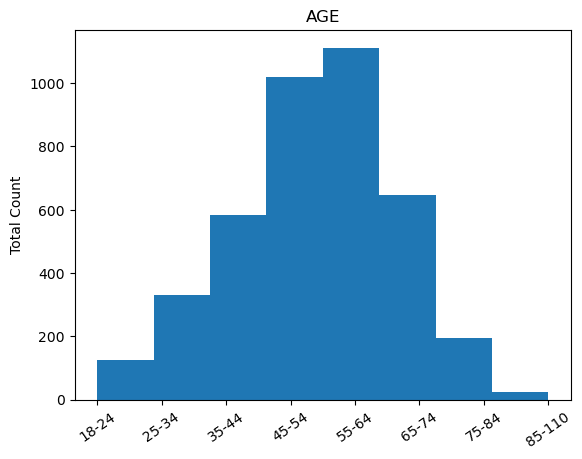

In [751]:
show_summary_histogram(df_who, 'age')
# df_who['age'].nunique()

RESPONDENT_TYPE  | Count Values: 4033
Peer              3368
Both               550
Carer               90
Connection          23
Not Applicable       2
Name: respondent_type, dtype: int64


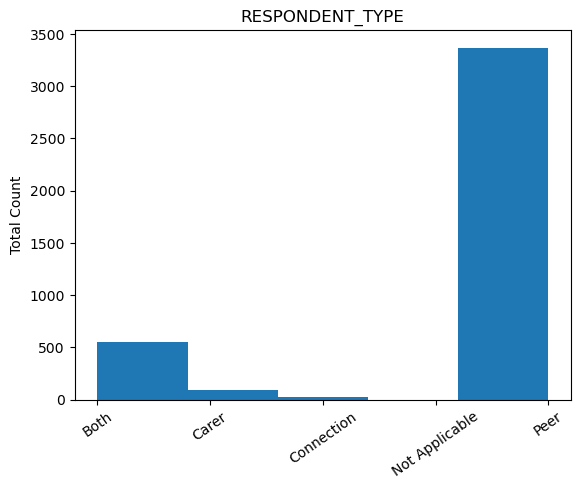

COMPLETION_RATE  | Count Values: 4033
Completed             3276
Partial Completion     757
Name: completion_rate, dtype: int64


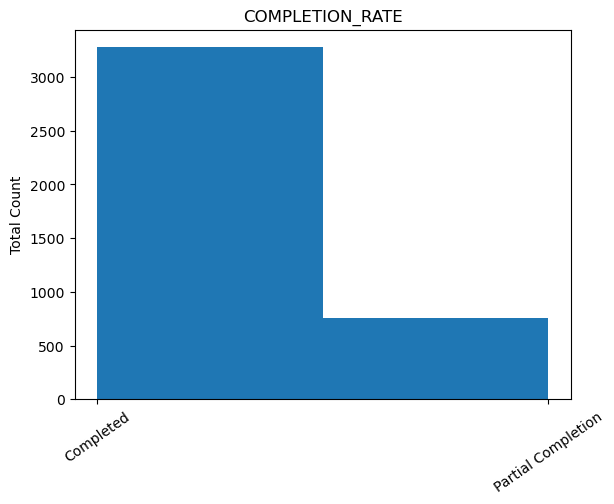

AGE  | Count Values: 4033
55-64     1112
45-54     1020
65-74      645
35-44      582
25-34      329
75-84      196
18-24      124
85-110      25
Name: age, dtype: int64


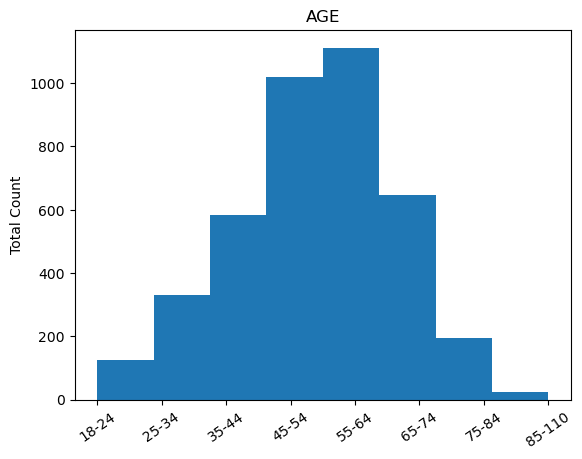

GENDER  | Count Values: 4033
Female        3338
Male           425
Not Stated     171
Non_Binary      93
Not Listed       6
Name: gender, dtype: int64


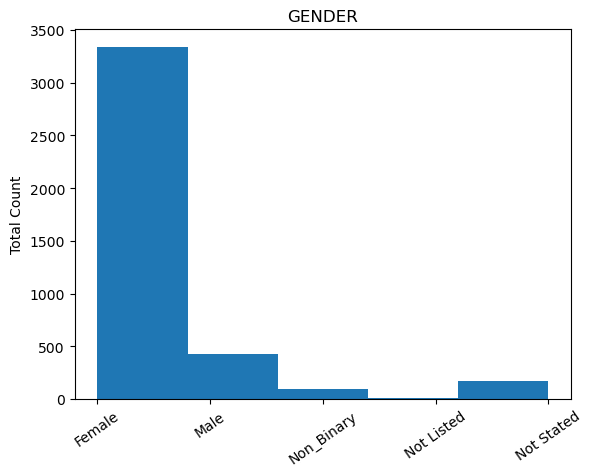

STATE  | Count Values: 4033
QLD           1036
NSW           1031
VIC            929
SA             381
WA             329
TAS            151
ACT            140
NT              22
NOT STATED      14
Name: state, dtype: int64


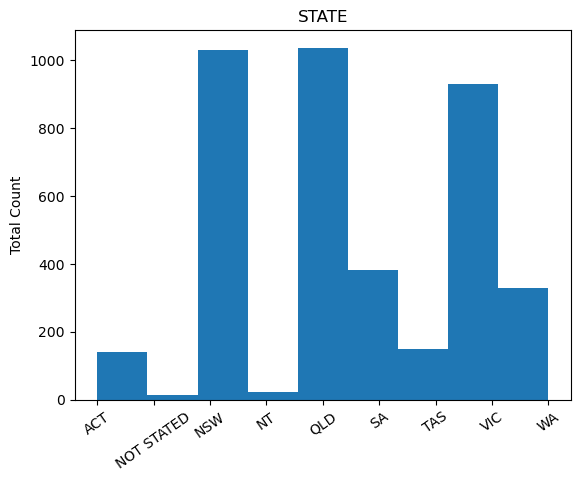

INCOME_WEEKLY  | Count Values: 4033
0500-999      1086
Not Stated     652
1000-1499      577
0001-499       572
0000           356
1500-1999      339
2000-2499      178
2500-2999      113
3000-3999       69
5000            56
4000-4999       35
Name: income_weekly, dtype: int64


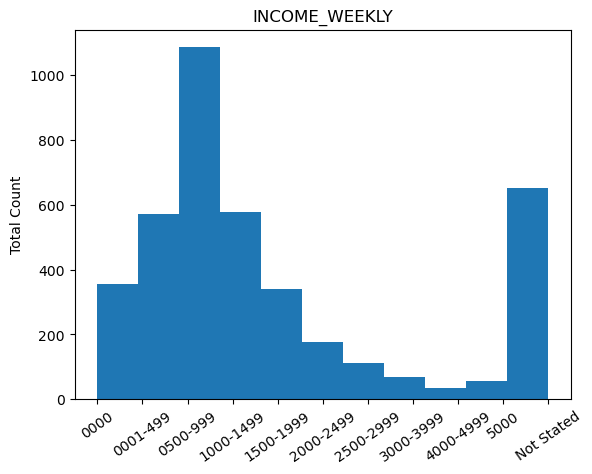

FIRST_NATIONS  | Count Values: 4033
No            3641
Not Stated     246
Yes            146
Name: first_nations, dtype: int64


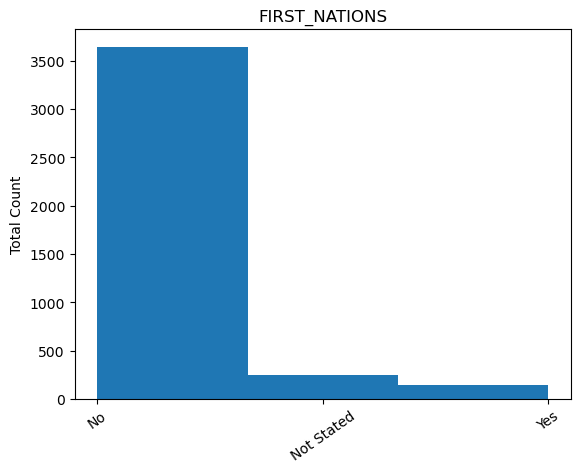

LGBTQ  | Count Values: 4033
No            3380
Yes            506
Not Stated     147
Name: lgbtq, dtype: int64


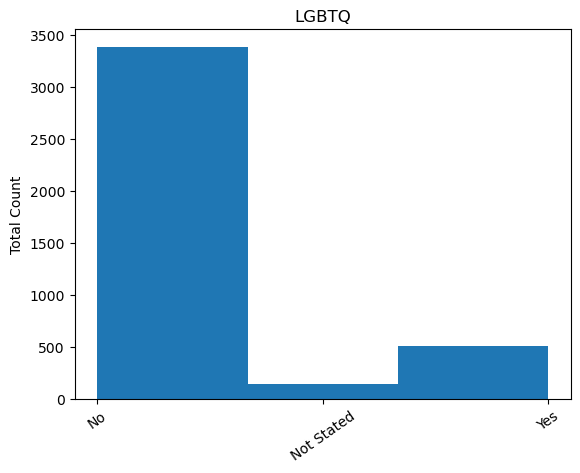

MULTI_CULTURAL  | Count Values: 4033
No            3601
Yes            270
Not Stated     162
Name: multi_cultural, dtype: int64


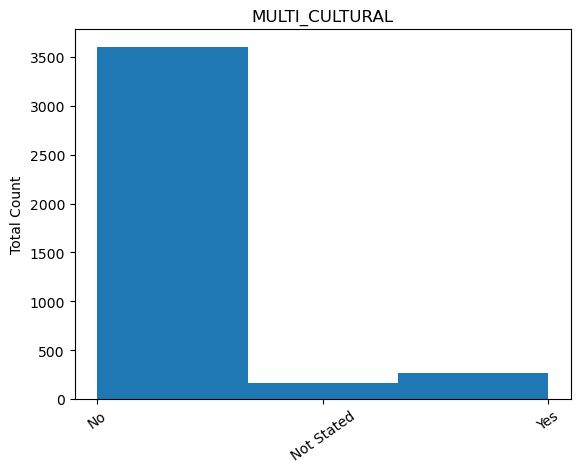

DX___AUTISM  | Count Values: 4033
0    3677
1     356
Name: dx___autism, dtype: int64


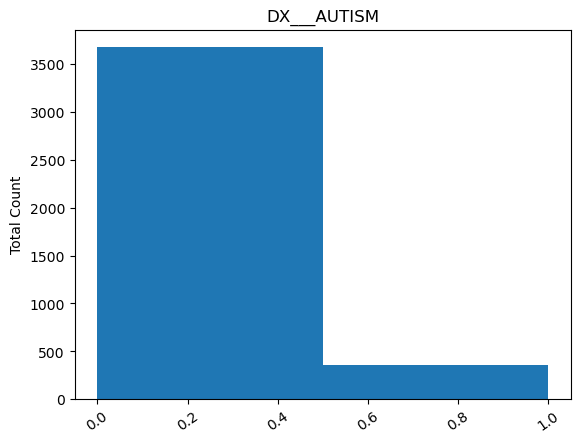

DX___ADHD  | Count Values: 4033
0    3435
1     598
Name: dx___adhd, dtype: int64


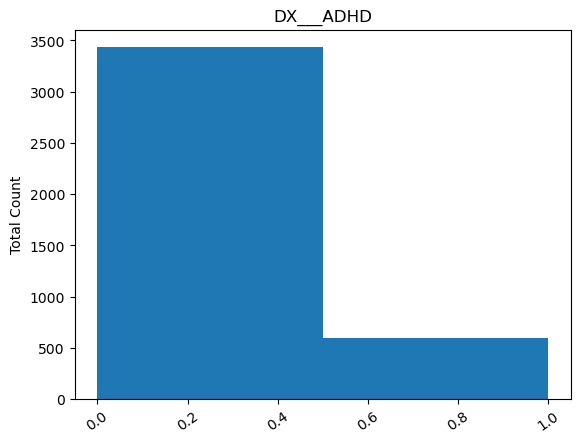

DX___DYSCALCULIA  | Count Values: 4033
0    3969
1      64
Name: dx___dyscalculia, dtype: int64


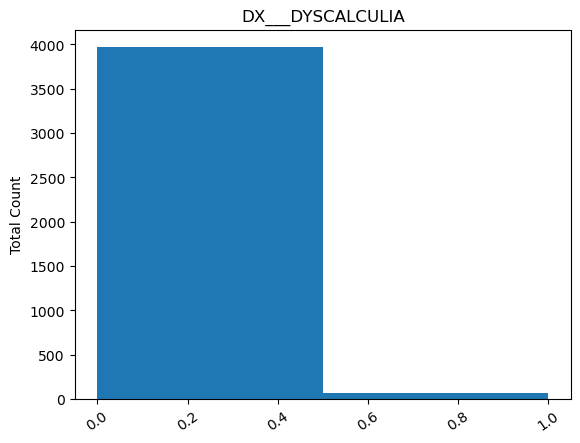

DX___DYSLEXIA  | Count Values: 4033
0    3902
1     131
Name: dx___dyslexia, dtype: int64


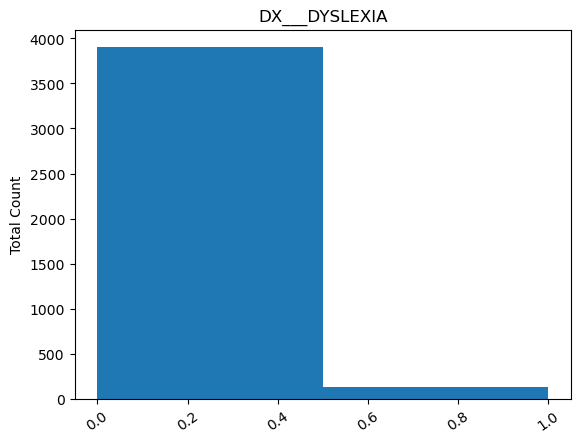

DX___DYSPRAXIA  | Count Values: 4033
0    3990
1      43
Name: dx___dyspraxia, dtype: int64


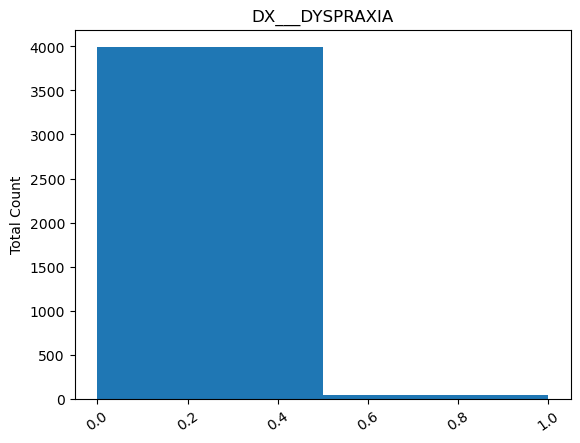

DX___EPILEPSY  | Count Values: 4033
0    3961
1      72
Name: dx___epilepsy, dtype: int64


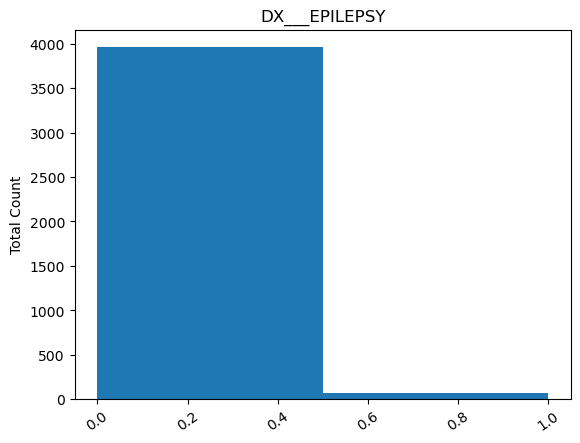

DX___APD  | Count Values: 4033
0    3931
1     102
Name: dx___apd, dtype: int64


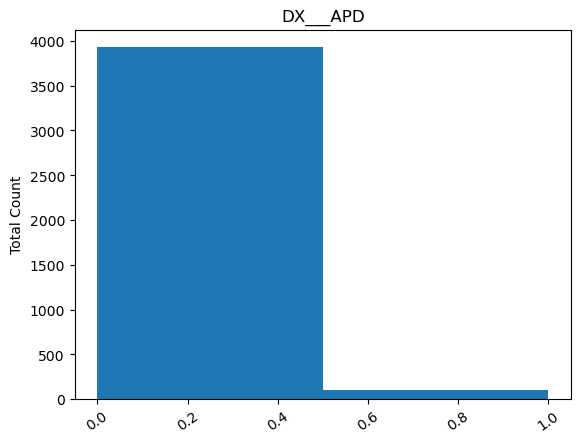

DX___ID  | Count Values: 4033
0    4010
1      23
Name: dx___id, dtype: int64


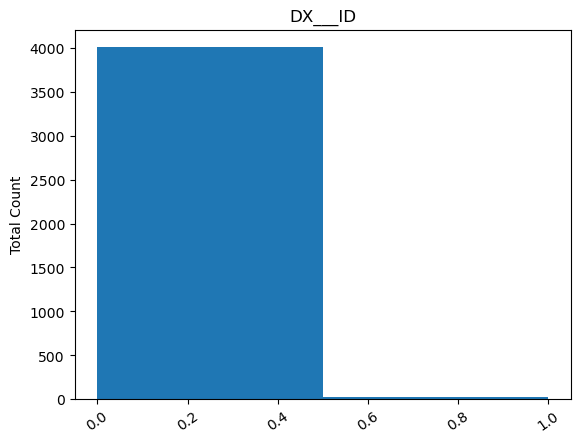

DX___TS  | Count Values: 4033
0    4009
1      24
Name: dx___ts, dtype: int64


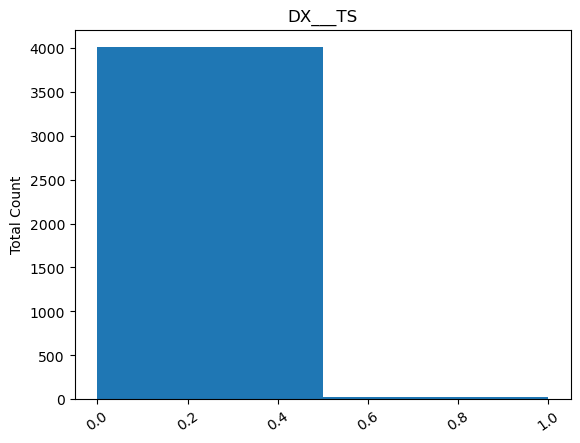

DX___NA  | Count Values: 4033
1    2334
0    1699
Name: dx___na, dtype: int64


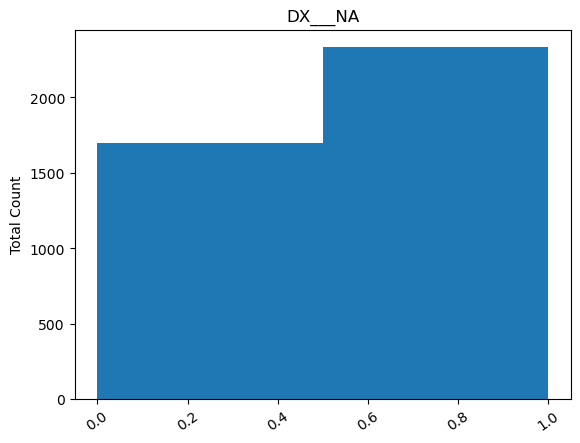

DX___NS  | Count Values: 4033
0    3924
1     109
Name: dx___ns, dtype: int64


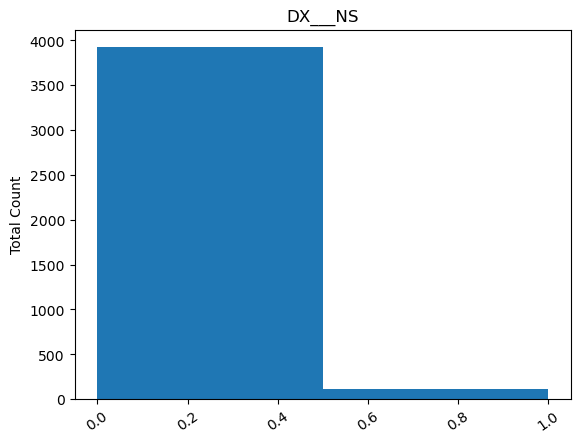

DX___NL  | Count Values: 4033
0    3303
1     730
Name: dx___nl, dtype: int64


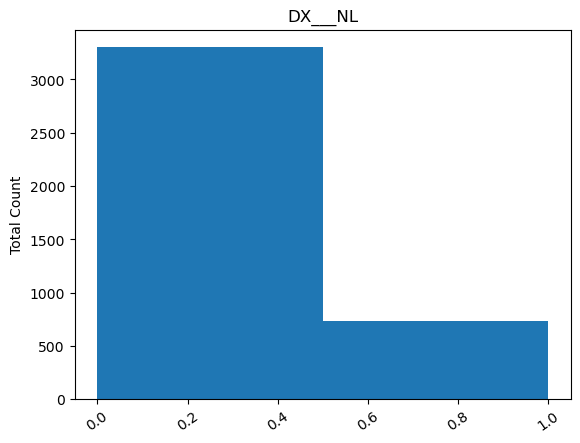

In [752]:
for i in df_who.columns.to_list():
    if (i not in ['record_id', 'gender_txt','dx_txt', 'postcode']):
        show_summary_histogram(df_who, i)

        # print(i.upper(), ', Count:', df_who[i].count())
        # print(df_who[i].value_counts(), '\n')
        # df_who = df_who.sort_values(by=i)
        # df_who[i].hist()
        # plt.tick_params('x', rotation=35)
        # plt.show()
        

## The Impact of Pain

In [732]:
df_impact = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'state',
 'postcode',
 'income_weekly',
 'pn_type___back',
 'pn_type___neck',
 'pn_type___joint',
 'pn_type___migraines',
 'pn_type___widespread',
 'pn_type___osteoarthritis',
 'pn_type___rheumatoid_arthritis',
 'pn_type___pelvic',
 'pn_type___abdominal',
 'pn_type___crps',
 'pn_type___nerve',
 'pn_type___connective_tissue_disorder',
 'pn_type___na',
 'pn_type___nl',
 'pn_type_txt',
 'pn_impact',
 'hc_dx_length',
 'work',
 'life_xp___mental_health',
 'life_xp___ptsd',
 'life_xp___dims',
 'life_xp___unable_work',
 'life_xp___low_productivity',
 'life_xp___strain_financial',
 'life_xp___strain_family',
 'life_xp___strain_friends',
 'life_xp___unable_family',
 'life_xp___less_intimacy',
 'life_xp___inactivity',
 'life_xp___changed_eating',
 'life_xp___less_independence',
 'life_xp___unable_drive',
 'life_xp___na',
 'life_xp___nl',
 'life_xp_txt',
 'hc_sleep_tests',
 'hc_sleep_strategies___reg_schedule',
 'hc_sleep_strategies___less_caffeine_alcohol',
 'hc_sleep_strategies___comfort',
 'hc_sleep_strategies___relaxation',
 'hc_sleep_strategies___less_screen',
 'hc_sleep_strategies___medication',
 'hc_sleep_strategies___bed_mattress',
 'hc_sleep_strategies___na',
 'hc_sleep_strategies___nl',
 'hc_sleep_strategies_txt',
 'dx_covid_status',
 'dx_covid_long',
 'dx_covid_long_pn'
]]

## Accessing Healthcare

In [433]:
df_access = df[['record_id',
 'respondent_type',
 'completion_rate',
 'age',
 'gender',
 'state',
 'postcode',
 'hc_dx_length',
 'hc_xp_pn_ref_type',
 'hc_xp_pn_wait',
 'hc_xp_pn_appt_type',
 'hc_xp_pn_appt_type_txt',
 'hc_xp_pn_appt_approp',
 'hc_xp_pn_appt_comfort',
 'hc_xp_pn_appt_safe',
 'hc_xp_pn_appt_tailor',
 'hc_xp_pn_appt_txt',
 'hc_xp_pn_appt_rec',
 'hc_xp_pn_appt_rec_txt',
 'cd_mgmt_plan',
 'mh_mgmt_plan',
 'hc_appt___unavailable',
 'hc_appt___closed_books',
 'hc_appt___no_new',
 'hc_appt___no_chronic',
 'hc_appt___na',
 'hc_appt___nl',
 'hc_appt_txt',
 'hc_pn_care_review',
 'hc_pn_care_modal_inp_self',
 'hc_pn_care_modal_inp_supp',
 'hc_pn_care_modal_inp_hcp',
 'hc_pn_care_modal_tlh_self',
 'hc_pn_care_modal_tlh_supp',
 'hc_pn_care_modal_tlh_hcp',
 'hc_pn_care_modal_txt',
 'hc_tlh_location',
 'hc_tlh_location_txt',
 'hc_tlh_opinion',
 'hc_tlh_opinion_txt',
 'hc_opioid_rx___not_aware',
 'hc_opioid_rx___no_change',
 'hc_opioid_rx___choice_reduce',
 'hc_opioid_rx___no_choice_reduce',
 'hc_opioid_rx___ref_physio_psych',
 'hc_opioid_rx___ref_pn_program',
 'hc_opioid_rx___ref_pn_clinic',
 'hc_opioid_rx___na',
 'hc_opioid_rx___nl',
 'hc_opioid_rx_txt',
 'hc_opioid_sub___med_cannabis',
 'hc_opioid_sub___antidepressant',
 'hc_opioid_sub___anticonvulsants',
 'hc_opioid_sub___sedatives',
 'hc_opioid_sub___antiinflammatory',
 'hc_opioid_sub___na',
 'hc_opioid_sub___nl',
 'hc_opioid_sub_txt',
 'hc_pn_mgmt_alt___alcohol',
 'hc_pn_mgmt_alt___cigarettes',
 'hc_pn_mgmt_alt___vaping',
 'hc_pn_mgmt_alt___cannabis_nonmeds',
 'hc_pn_mgmt_alt___recr_substances',
 'hc_pn_mgmt_alt___ns',
 'hc_pn_mgmt_alt___na',
 'hc_pn_mgmt_alt___nl',
 'hc_pn_mgmt_alt_rec_txt',
 'hc_pn_mgmt_alt_txt',
 'hc_pn_mgmt_cnb_meds_acs',
 'hc_pn_mgmt_cnb_meds_help',
 'hc_pn_mgmt_cnb_meds_brr___na',
 'hc_pn_mgmt_cnb_meds_brr___cost',
 'hc_pn_mgmt_cnb_meds_brr___limited_hc_prescriber',
 'hc_pn_mgmt_cnb_meds_brr___limited_availability',
 'hc_pn_mgmt_cnb_meds_brr___limited_dispensaries',
 'hc_pn_mgmt_cnb_meds_brr___stigma',
 'hc_pn_mgmt_cnb_meds_brr___driving_restrictions',
 'hc_pn_mgmt_cnb_meds_brr___side_effects',
 'hc_pn_mgmt_cnb_meds_brr___nl',
 'pwp_ac_mc3_other'
]]

## Affording Healthcare

In [412]:
df.columns.to_list()

['record_id',
 'cpa_nps_2025_timestamp',
 'respondent_type',
 'age',
 'gender',
 'gender_txt',
 'state',
 'postcode',
 'income_weekly',
 'first_nations',
 'lgbtq',
 'multi_cultural',
 'dx___autism',
 'dx___adhd',
 'dx___dyscalculia',
 'dx___dyslexia',
 'dx___dyspraxia',
 'dx___epilepsy',
 'dx___apd',
 'dx___id',
 'dx___ts',
 'dx___na',
 'dx___ns',
 'dx___nl',
 'dx_txt',
 'pn_type___back',
 'pn_type___neck',
 'pn_type___joint',
 'pn_type___migraines',
 'pn_type___widespread',
 'pn_type___osteoarthritis',
 'pn_type___rheumatoid_arthritis',
 'pn_type___pelvic',
 'pn_type___abdominal',
 'pn_type___crps',
 'pn_type___nerve',
 'pn_type___connective_tissue_disorder',
 'pn_type___na',
 'pn_type___nl',
 'pn_type_txt',
 'pn_impact',
 'hc_dx_length',
 'work',
 'life_xp___mental_health',
 'life_xp___ptsd',
 'life_xp___dims',
 'life_xp___unable_work',
 'life_xp___low_productivity',
 'life_xp___strain_financial',
 'life_xp___strain_family',
 'life_xp___strain_friends',
 'life_xp___unable_family',
 '

In [410]:
df[['gender','gender_txt']].loc[df['gender_txt'].notna()]

,gender,gender_txt
1657,non_binary,Agender
1833,non_binary,genderqueer
2635,non_binary,genderqueer (please note male and female are s...
2686,non_binary,transgender
3016,non_binary,Trans masc
4354,non_binary,Transgender


In [411]:
df['gender'].value_counts()

female        3339
male           425
non_binary      99
ns              20
Name: gender, dtype: int64